In [74]:
import networkx as nx
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
import pulp

In [ ]:
g =nx.erdos_renyi_graph(n=40,p=0.05)

In [ ]:
Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
G0 = Gcc[0]

In [ ]:
nx.min_edge_cover(G0)

In [ ]:
a=nx.maximal_independent_set(G0)

In [ ]:
#nx.draw(G0,nodelist=a,node_color='b')
color_map = []
for node in G0:
    if node in a:
        color_map.append('blue')
    else: color_map.append('green') 
nx.draw(G0,node_color=color_map)

In [ ]:
nx.subgraph(G1)

In [ ]:
import sys
import graph
import environment
import runner
import agent

In [ ]:
import torch

In [ ]:
g=graph.Graph("erdos_renyi",50,0.10)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Add, Dot, Concatenate, ReLU, Permute
from keras.activations import relu
from keras.optimizers import sgd
import keras.backend as K
import numpy as np

In [ ]:
nodes=50
p=32
T=4
xv = Input(shape=(nodes,))
mu_init = Input(shape=(nodes,p))
adj = Input(shape=(nodes, nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p, input_dim=nodes)(xv)
        mu_2 = Dense(p, input_dim=p)(Dot(axes=1)([p, mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p, input_dim=nodes)(xv)
        mu_2 = Dense(p, input_dim=p)(Dot(axes=1)([adj, mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p, input_dim=p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p,input_dim=p)(mu)
q=ReLU()(Concatenate()([q_1,q_2]))

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.compile(optimizer='rmsprop',
        loss='mse')

In [ ]:
xv_=np.random.randn(1,nodes,1)
mu_init_=np.zeros((1,nodes,p))
adj_ = g.adj().todense() 
adj_ = np.expand_dims(adj_,axis=0)
qp=np.random.randn(1,nodes,1)

In [ ]:
adj_.shape

In [ ]:
model.fit(x=[xv_,mu_init,adj],y=qp,epochs=10,steps_per_epoch=20)

In [ ]:
nodes=50
p=32
T=3
xv = Input(batch_shape=(1,nodes,1))
mu_init = Input(batch_shape=(1,nodes,p))
adj = Input(batch_shape=(1,nodes,nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p)(mu)
q_=Concatenate(axis=2)([q_1,q_2])
q=Dense(1,activation="relu")(q_)

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.compile(optimizer='rmsprop',
        loss='mse')
model.fit(epochs=1,steps_per_epoch=2,validation_steps=2)

In [ ]:
mu_2.name

In [ ]:
model.fit(x=[xv_,mu_init,adj],y=qp)

In [ ]:
mu.shape

In [ ]:
Concatenate(axis=2)([q_1,q_2]).shape

In [ ]:
q.shape

In [ ]:
a=Dot(axes=1)([adj,mu_init])

In [ ]:
a.shape

In [ ]:
############ torch

In [ ]:
nodes=50
p=32
T=3
xv = Input(batch_shape=(1,nodes,1))
mu_init = Input(batch_shape=(1,nodes,p))
adj = Input(batch_shape=(1,nodes,nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p)(mu)
q_=Concatenate(axis=2)([q_1,q_2])
q=Dense(1,activation="relu")(q_)

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.comp²ile(optimizer='rmsprop',
        loss='mse')
model.fit(epochs=1,steps_per_epoch=2,validation_steps=2)

In [ ]:
batch_size=8
T=4
xv=torch.randn(batch_size,nodes,1)
mu_init=torch.randn(batch_size,nodes,p)
adj=torch.randn(batch_size,nodes,nodes)
y=torch.randn(batch_size,nodes,1)

class S2V_QN(torch.nn.Module):
    def __init__(self,p,nodes):
        
        super(S2V_QN,self).__init__()
        self.mu_1=torch.nn.Linear(1,p)
        self.mu_2=torch.nn.Linear(p,p)
        self.q_1=torch.nn.Linear(p,p)
        self.q_2=torch.nn.Linear(p,p)
        self.q=torch.nn.Linear(2*p,1)
    
    def forward(self,xv,adj,mu_init,T):

        for t in range(T):
            if t==0:
                mu_1=self.mu_1(xv)
                mu_2=self.mu_2(torch.matmul(adj,mu_init))
                mu=torch.add(mu_1,mu_2).clamp(0)
            
            else:
                mu_1=self.mu_1(xv)
                mu_2=self.mu_2(torch.matmul(adj,mu))
                mu=torch.add(mu_1,mu_2).clamp(0)
                

        q_1=self.q_1(torch.matmul(adj,mu))
        q_2=self.q_2(mu)
        q_=torch.cat((q_1,q_2),dim=2)
        q=self.q(q_)
        return q
model=S2V_QN(32,50)

criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.SGD(model.parameters(),lr=1e-10,momentum=0.9)
for t in range(67):
    y_pred = model(xv,adj,mu_init,T)
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
torch.cat((q_1,q_2),dim=1).shape

In [ ]:
a.shape

In [ ]:
mu_1.shape

In [ ]:
mu_2.shape

In [ ]:
xv=torch.randn(8,nodes,1)
mu_init=torch.randn(1,nodes,p)
#mu_init=np.random.randn(8,nodes,p)
adj=torch.randn(1,nodes,nodes)
mu1=torch.nn.Linear(1,p)(xv)
mu2=torch.nn.Linear(p,p)(torch.matmul(adj,mu_init))
mu_=torch.add(mu1,mu2).clamp(0)

mu1=torch.nn.Linear(1,p)(xv)
mu2=torch.nn.Linear(p,p)(torch.matmul(adj,mu_))
mu_=torch.add(mu1,mu2).clamp(0)

q_1=torch.nn.Linear(p,p)(torch.matmul(adj,mu_))
q_2=torch.nn.Linear(p,p)(mu_)
q_=torch.cat((q_1,q_2),dim=-1)
q=torch.nn.Linear(2*p,1)(q_)

In [ ]:
q[2,0]

##### q_1.shape

In [ ]:
torch.matmul(adj,mu_).shape

In [ ]:
q.shape

In [ ]:
torch.from_numpy(np.expand_dims(g.adj().todense().astype(int),axis=0))

In [ ]:
a=np.zeros(4)

In [ ]:
b=3
c=4
d=np.zeros(4)

In [ ]:
a=torch.zeros(8,1)
a[1]=1
np.sum(a.numpy())

In [ ]:
memory.append((a,b,c,d))

In [ ]:
memory

In [ ]:
import random
minibatch = random.sample(memory, 8 - 1)
minibatch.append(memory[-1])

In [ ]:
for a,b,c,d in minibatch:
    print(a)
    print(b)
    print(c)
    print(d)

In [ ]:
observation=torch.zeros(6,1)

In [ ]:
observation[1]=1

In [ ]:
observation[observation==0]

In [ ]:
a=observation.numpy()

In [ ]:
np.random.choice(np.where(a==0)[0])

In [ ]:
a=[1,2,3,4]

In [ ]:
for i in range(1,4):
    print(i)

In [ ]:
observation

In [ ]:
#observation=observation.numpy()
q=torch.randn(6,1).detach().numpy()
np.where((q==np.max(q[observation==0])))[0]

In [ ]:
q[observation==0

In [ ]:

g=nx.gnp_random_graph(n=50,p=0.1)
nx.draw(g)

In [ ]:
a=torch.zeros(1,16,1)
b=torch.ones(1,1)
list_=[]

In [ ]:
list
list_.append((a,b,b,a))

In [ ]:
np.array(list_[0][1])

In [ ]:
list_

In [ ]:
c=torch.empty(1,16,1)
b=list_[0][1]
for t,i in enumerate(list_):
    
    c=torch.cat((c,i[0]),dim=0)
    b=torch.cat((b,i[1]),dim=0)
c.shape

In [ ]:
torch.empty(16,1)

In [ ]:
torch.max(c,dim=1)[0]

In [ ]:
d=torch.ones(6,3,1)

In [ ]:
obs=torch.ones(6,3,1)
obs[1][2]=0

In [ ]:
obs[0][1]=0

In [ ]:
sel=obs*(-1e5)

In [ ]:
d+sel

In [ ]:
r=torch.cat((torch.tensor([[1.]]),torch.tensor([[3.]])))

In [ ]:
g=torch.ones(2,1)

In [ ]:
g+r

In [ ]:
l=torch.randn(3,5,1)

In [ ]:
l

In [ ]:
l[range(3),torch.tensor([0,1,2]),:]

In [ ]:
l

In [ ]:
ll=[38.0, 35.0, 37.0, 38.0, 37.0, 35.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 38.0, 38.0, 38.0, 38.0, 35.0, 38.0, 36.0, 34.0, 34.0, 37.0, 38.0, 35.0, 34.0, 38.0, 35.0, 38.0, 34.0, 38.0, 38.0, 35.0, 36.0, 38.0, 38.0, 38.0, 35.0, 38.0, 38.0, 38.0, 35.0, 38.0, 38.0, 33.0, 38.0, 38.0, 33.0, 32.0, 33.0, 28.0, 29.0, 32.0, 29.0, 29.0, 30.0, 29.0, 30.0, 31.0, 29.0, 29.0, 31.0, 30.0, 25.0, 30.0, 28.0, 30.0, 26.0, 27.0, 25.0, 26.0, 27.0, 26.0, 26.0, 26.0, 23.0, 23.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 20.0, 21.0, 20.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.0, 20.0, 21.0, 21.0, 20.0, 20.0, 21.0, 21.0, 20.0, 21.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 25.0, 27.0, 20.0, 25.0, 27.0, 25.0, 25.0, 25.0, 25.0]
ll_w2V=[39.0, 38.0, 38.0, 34.0, 33.0, 34.0, 33.0, 31.0, 32.0, 35.0, 34.0, 34.0, 37.0, 38.0, 37.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 33.0, 34.0, 34.0, 33.0, 34.0, 33.0, 33.0, 33.0, 32.0, 33.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 32.0, 31.0, 32.0, 31.0, 31.0, 30.0, 33.0, 31.0, 30.0, 31.0, 29.0, 27.0, 28.0, 28.0, 26.0, 30.0, 28.0, 30.0, 29.0, 26.0, 28.0, 26.0, 26.0, 26.0, 29.0, 26.0, 27.0, 26.0, 28.0, 28.0, 26.0, 27.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 28.0, 27.0, 28.0, 26.0, 27.0, 26.0, 27.0, 27.0, 29.0, 24.0, 26.0, 26.0, 26.0, 27.0, 28.0, 26.0, 29.0, 28.0, 26.0, 27.0, 26.0, 27.0, 27.0, 26.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 26.0, 28.0, 26.0, 26.0, 26.0, 27.0, 27.0, 28.0, 27.0, 26.0, 28.0, 28.0, 26.0, 26.0, 27.0, 28.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 26.0, 25.0, 23.0, 27.0, 23.0]

In [ ]:
plt.plot(ll)
plt.plot(ll_w2V)

In [ ]:
from gensim.models import Word2Vec
import random
from sklearn import decomposition

In [ ]:
num_paths=400
path_length=40
seed=12
embed_size=32
window_size=5

In [ ]:
G = nx.gnp_random_graph(n=60,p=0.1,seed=seed)

In [ ]:
nx.neighbors(G,1)

In [ ]:
def random_walk(G,path_length, alpha=0, rand=random.Random(), start=None):    
    
    if start:
        path = [start]
    else:
        # Sampling is uniform w.r.t V, and not w.r.t E
        path = [rand.choice(list(G.nodes()))]

    while len(path) < path_length:
        cur = path[-1]
        if len(G[cur]) > 0:
            if rand.random() >= alpha:
                path.append(rand.choice(list(nx.neighbors(G,cur))))
            else:
                path.append(path[0])
        else:
            break
    return [str(node) for node in path]

In [ ]:




def build_deepwalk_corpus(G, num_paths, path_length, alpha=0,rand=random.Random(0)):
    walks = []

    nodes = list(G.nodes())

    for cnt in range(num_paths):
        rand.shuffle(nodes)
        for node in nodes:
            
            walks.append(random_walk(G,path_length, rand=rand, alpha=alpha, start=node))

    return walks

In [ ]:
print("Walking...")
walks = build_deepwalk_corpus(g, num_paths=num_paths,
                                    path_length=path_length, alpha=0,
                                    rand=random.Random(seed))

In [ ]:
vertex_counts=dict(G.degree())

In [ ]:
print("Training...")
model = Word2Vec(walks,size=embed_size, window=window_size
                 , min_count=0, sg=1, hs=1,iter=1, negative=0,compute_loss=True)
#model.build_vocab(walks)
model.get_latest_training_loss()

In [ ]:
  # prepare the model vocabulary
for i in range(10):
    print(model.train(walks,epochs=1,total_examples=model.corpus_count,compute_loss=True))
    print(model.get_latest_training_loss())
#model.get_latest_training_loss()

In [ ]:
X=model[list(model.wv.vocab)]

In [ ]:
words = map(int,list(model.wv.vocab))
deg=list(words)

In [ ]:
s=[i[1] for i in list(g.degree(deg))]

In [ ]:
deg_n=list(nx.average_neighbor_degree(g,list(words)).values())

In [ ]:
c=[deg_n[i] for i in deg]

In [ ]:
pca = decomposition.PCA(n_components=2)

result = pca.fit_transform(X)

In [ ]:
u=torch.from_numpy(np.expand_dims(X,axis=0))
u.shape

In [ ]:

plt.scatter(result[:, 0], result[:, 1],s=[i**3 for i in s],c=c)

In [ ]:
X=model_skip[model_skip.wv.vocab]

In [ ]:
pca = decomposition.PCA(n_components=2)

result = pca.fit_transform(X)

In [ ]:

plt.scatter(result[:, 0], result[:, 1])


In [ ]:
g = nx.erdos_renyi_graph(n=50, p=0.07, seed=seed)

In [ ]:
nx.draw(g)

In [ ]:
g[9]

In [ ]:
nx.adjacency_matrix(g).todense()[9].sum()

In [ ]:
l=[29.0, 34.0, 36.0, 37.0, 36.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 34.0, 32.0, 32.0, 33.0, 34.0, 31.0, 33.0, 34.0, 35.0, 33.0, 34.0, 33.0, 32.0, 33.0, 32.0, 32.0, 34.0, 33.0, 34.0, 34.0, 33.0, 33.0, 34.0, 35.0, 32.0, 32.0, 32.0, 32.0, 32.0, 29.0, 26.0, 29.0, 26.0, 27.0, 27.0, 27.0, 28.0, 29.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 26.0, 27.0, 28.0, 26.0, 27.0, 28.0, 26.0, 26.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 29.0, 28.0, 26.0, 27.0, 28.0, 26.0, 26.0, 26.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 27.0, 27.0, 26.0, 27.0, 27.0, 27.0, 26.0, 26.0, 28.0, 27.0, 26.0, 27.0, 29.0, 26.0, 25.0, 28.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 29.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 28.0, 24.0, 27.0, 27.0, 27.0, 26.0]

In [ ]:
plt.plot(l)

In [ ]:
seed=12
g = nx.erdos_renyi_graph(n=20, p=0.12, seed=seed)

In [ ]:
nx.draw(g)

In [ ]:
l_s2V_r2_5=np.array([352.7248308566741, 381.4600192460666, 359.16362679862493, 379.32293933471976, 382.0555117252666, 371.90396643360657, 372.2236827682573, 382.54333954643226, 382.8811235204283, 371.7552965261283, 382.5739060503756, 363.04020965227267, 334.49284137227954, 349.49612348996345, 349.3759900083172, 302.5438685951179, 299.10087579562725, 298.12188394805366, 298.8610531161149, 268.95167046977565, 248.7651847687759, 218.53560985224448, 254.12744710081546, 238.485269022608, 258.4538372912206, 228.25281361569608, 278.44659636803146, 238.37170459313967, 248.37180712218958, 238.4436019939844, 268.65285042378645, 228.28463179751427, 248.39736240883116, 238.407704558087, 238.3811019939844, 258.3424297013648, 265.8468524720644, 238.30930712218958, 258.49543313184495, 238.4221180585299, 238.34520455808703, 248.34060721889446, 228.3327049200439, 248.30930712218958, 238.30930712218955, 238.31525950314196, 228.28463179751427, 238.38399169687418, 238.42509586243483, 228.2702049200439, 238.41253547596142, 268.52843759027746, 238.35642666930914, 228.2702049200439, 258.4441881736324, 218.5004366920713, 218.2388623495709, 236.4864889208065, 258.27020492004397, 238.27020492004394, 228.27020492004394, 228.27020492004394, 228.27020492004394, 248.44323203912364, 248.34060721889452, 228.33040862730647, 228.31784824083303, 228.33040862730647, 228.27020492004394, 238.40477066877378, 238.33040862730647, 228.33040862730647, 228.31784824083303, 238.43068032757816, 246.62703839885597, 218.3193089718132, 248.4106091285596, 228.43068032757816, 238.27020492004394, 244.38545076621955, 218.40560382701034, 228.43068032757816, 238.4770981254665, 228.43068032757816, 248.43068032757816, 238.43068032757816, 238.4713207216668, 228.43068032757816, 228.43068032757816, 228.46407979847763, 248.61876479213313, 218.47727651891117, 238.48147397837178, 228.43068032757816, 238.66190700320135, 228.49318032757816, 228.43068032757816, 228.43068032757816, 228.43068032757816, 238.43068032757816, 228.2702049200439, 228.5072943878364, 228.43068032757816, 234.38393561470443, 244.45026558103436, 234.4027209566748, 254.49935560806557, 234.4145512953201, 228.4624985093963, 234.38467872465802, 228.6058805564111, 228.4624985093963, 234.44636947713826, 228.5249985093963, 228.4624985093963, 244.44636947713826, 228.3020231018621, 234.44636947713826, 244.36800900949925, 275.8696957278203, 234.44636947713826, 224.4929656684713, 244.4145512953201, 244.3576889413989, 226.58496179490308, 234.4145512953201, 244.4463694771383, 234.4463694771383, 244.2540758877859, 244.2540758877859, 244.2540758877859, 244.23668458343803, 234.23668458343803, 234.23668458343803, 243.61151915746612, 244.57125001800347, 234.23668458343803, 244.5123867931555, 234.35768894139892, 244.3460977768666, 244.4463694771383, 234.28589406960407, 234.28589406960404, 244.49499548880772, 254.25623085425866, 248.28026766042515, 244.26850276525622, 234.4463694771383, 229.72275480917918, 244.4463694771383])
l_s2V_r2_3=np.array([352.2369222144628, 350.6401166585577, 346.2104014704054, 371.99494741859894, 413.61294275927287, 413.18138220518574, 390.1724826727588, 413.66523004636196, 382.59400031948627, 413.45441832223577, 413.8572899023649, 349.2909984038013, 349.34199780481174, 379.1065720245539, 379.40946001205947, 378.5823800530794, 370.40887151081586, 338.4484430395388, 299.83629928679875, 299.8685054059614, 330.06960885798014, 309.79989486995953, 299.87175215920814, 309.9541843469035, 299.8321009891222, 309.8321009891222, 309.66034649519275, 296.57809541294165, 309.71256425793683, 299.66034649519275, 309.88645804156107, 299.62503478596796, 299.5693380672278, 350.066807737532, 330.06960885798014, 350.026049103894, 356.7610484702926, 336.8138843579532, 386.80720041885684, 319.6868101482868, 299.6690045038507, 330.0439678323391, 299.6690045038507, 299.6690045038507, 330.2106344990058, 300.6225692318057, 340.2106344990058, 330.2106344990058, 340.0439678323391, 340.05587259424385, 330.06960885798014, 350.04396783233915, 352.4933227734436, 299.68823527308155, 359.93158125495887, 299.6690045038507, 309.9738832872545, 349.83573984147046, 350.2106344990058, 330.1080703964417, 299.6690045038507, 359.93158125495887, 309.7382476600504, 290.01091856138595, 340.0612770221547, 319.9495502152872, 349.93158125495887, 349.90755528093297, 299.64236160521295, 279.8622450356227, 339.8975241084018, 319.7060415408877, 300.0333294795013, 339.9396260956444, 289.8357892789038, 299.6826399827036, 339.9122299907547, 330.08151361988484, 309.3955206976995, 319.96663522722514, 299.87435120287597, 315.84754304371484, 290.0438189899908, 289.81014825326275, 289.9604856566575, 299.8487101772349, 299.9539957697328, 308.321133765757, 339.91577437665205, 299.8487101772349, 299.874351202876, 339.8231817840595, 299.93529026381503, 329.8625870411118, 299.9576845362093, 329.81127702215474, 329.8231817840595, 299.8487101772349, 299.75710964813436, 329.8231817840595, 320.0439678323391, 289.616042473459, 289.87435120287597, 309.9396260956444, 280.1271523233242, 299.95433197799736, 319.9304441839689, 289.93204351056823, 279.7986701486261, 279.67671094442164, 300.0477139855418, 270.0140987102706, 279.93204351056823, 289.893263661782, 299.89461035548806, 289.93204351056823, 319.8030098263875, 289.89461035548806, 270.11666281283465, 259.68734619267303, 279.9096055182773, 289.93204351056823, 299.84262775085193, 266.18376785295897, 280.1166628128347, 299.89461035548806, 256.5341256950589, 259.7051318928116, 270.0695202755386, 350.17871653419144, 299.7921677599946, 300.16248093806456, 300.058673714692, 303.126575645069, 242.27322070367444, 259.8384618471337, 249.6977094906524, 359.8088206017635, 280.058673714692, 282.3334976312655, 261.97995961781476, 292.34536030025413, 251.11876532455588, 259.8126999988654, 279.89461035548806, 269.8030098263875, 267.39252098808305, 278.8351058596758, 252.22585862542854, 369.6867967922397])
l_w2v_r2_5=np.array([322.07988831830943, 369.023374822059, 355.51186206580945, 375.9079924072029, 380.67072398361876, 363.2350370487213, 368.9572476256686, 369.18933186696347, 379.15878240667706, 379.46243192480034, 359.2500409629357, 369.31481287718134, 299.311601059759, 287.57931832300255, 290.40524224313697, 270.27900125215916, 259.9675005306584, 259.7617570051781, 249.98594261489004, 249.88676182491974, 249.91451404346142, 239.86338812259868, 239.86338812259868, 239.86338812259868, 239.7085873677979, 249.86338812259868, 249.86338812259868, 249.80896330764753, 249.87193513114568, 249.75862621783676, 239.97291193212249, 250.18920582341636, 249.86338812259868, 239.86338812259868, 239.84910240831294, 239.86338812259868, 239.97291193212249, 259.94910240831297, 249.8750840290314, 249.8133492725598, 239.7776738368844, 239.86338812259868, 260.1832145924251, 239.86338812259868, 239.86338812259868, 239.9014833606939, 239.86338812259868, 240.15230106151162, 239.86338812259868, 239.86338812259868, 249.86338812259868, 229.8919595511701, 239.86338812259868, 239.9414833606939, 240.16452328373379, 250.1245232837338, 240.1245232837338, 240.1245232837338, 240.1245232837338, 258.39317407738463, 249.97688018609074, 239.86096832017887, 239.91100717021772, 249.91100717021774, 240.12452328373382, 270.1364280456386, 240.1245232837338, 237.55309471230524, 250.19717840638899, 260.33126931547986, 240.1523010615116, 250.13621919016654, 240.1523010615116, 270.2413494400336, 260.33682487103545, 240.1245232837338, 250.03440506861563, 240.1245232837338, 240.11261852182903, 240.1245232837338, 239.00150741071795, 250.19288547709604, 240.1245232837338, 250.15209220603953, 260.0192951785057, 250.24465315386368, 250.0864280456386, 240.11499947421, 250.0864280456386, 250.0864280456386, 250.11261852182903, 270.08642804563857, 250.1264280456386, 250.08245979167035, 240.11261852182903, 250.09833280754336, 250.0864280456386, 260.08642804563857, 250.0864280456386, 250.0864280456386, 240.1523010615116, 240.11261852182903, 240.11261852182906, 250.11261852182903, 250.12055502976554, 250.11261852182903, 250.16579312500363, 240.11261852182906, 240.11261852182906, 250.11261852182903, 240.04328230249283, 249.91100717021774, 239.91100717021774, 239.91100717021774, 239.91100717021774, 259.90205612126664, 249.91955417876474, 240.03351799272855, 239.91100717021774, 270.3987296329402, 260.09090135011195, 239.91100717021774, 239.91100717021774, 236.6564617156723, 239.896721455932, 239.91100717021774, 239.90096832017886, 249.86096832017887, 249.90096832017886, 249.91100717021774, 239.86096832017887, 229.88243574164625, 249.75620641541695, 239.86096832017887, 249.86096832017887, 249.86096832017887, 239.77525403446458, 239.86096832017887, 239.86096832017887, 249.946721455932, 259.9195541787647, 239.9538643130748, 239.9004808544282, 239.86096832017887, 239.84668260589314, 249.82071412992462, 239.98347914268965, 239.86338812259868, 239.8133492725598, 239.8133492725598])
l_w2v_r2_3=np.array([312.85476197115764, 352.81521735413577, 390.8529351785793, 366.76223923623445, 382.79077250035954, 391.6975651464303, 382.88842447843336, 382.5607212704757, 382.976811463058, 382.50329963693156, 382.9860564152683, 345.7670221026357, 336.530647903299, 326.45720156709575, 296.22485890629014, 306.0257762578888, 285.96259372051276, 276.13911117847647, 268.6797174279243, 225.90648115633567, 225.91789256774706, 236.12777741005843, 235.8771017769563, 236.82141015641153, 235.88498653731713, 235.84932399917852, 235.80867261431206, 235.81027562065645, 235.75938740877683, 255.95982381788266, 235.80867261431206, 235.81306780163197, 235.82316881173298, 225.85668280989483, 245.82316881173298, 245.78678630854012, 245.91187848915234, 245.7724864805453, 235.82316881173298, 245.95740850679795, 235.82316881173298, 245.78983547839965, 235.87296301807612, 225.91789256774706, 255.84779228883255, 225.91789256774706, 248.6582436771336, 235.82316881173298, 249.1830488903704, 245.82316881173298, 236.03443218428671, 245.82316881173298, 245.8493239991785, 235.86981625867935, 235.78983547839965, 245.8493239991785, 235.82316881173298, 235.82316881173298, 245.74168733025152, 225.92589468751387, 235.8108881099786, 225.91789256774706, 225.88455923441373, 225.87314782300234, 245.9915238913784, 225.90648115633567, 225.9505988033945, 238.54853488971307, 235.90648115633567, 225.90648115633567, 245.86686642669073, 235.90840484726795, 245.81904533341597, 235.77842406698826, 246.08079843549166, 237.8735405943022, 235.8117574003216, 235.87314782300234, 225.90648115633567, 245.8117574003216, 225.95648115633566, 235.95871614994994, 235.8117574003216, 235.93088031830598, 245.88013346869766, 256.01355186340635, 225.92870337855788, 238.67047407027295, 225.92870337855786, 227.85112262434293, 245.5629495238424, 257.83306022697013, 237.8861653593857, 227.84537549790616, 227.85112262434293, 227.91133767810638, 227.85112262434293, 227.85112262434293, 227.85112262434293, 237.75639886832886, 247.91969748723832, 227.92301804917955, 237.88968471584622, 237.92301804917955, 237.88968471584622, 237.92301804917957, 237.9896847158462, 227.92301804917955, 227.85112262434293, 257.93022315087114, 247.88815966138, 257.92454869539836, 227.92301804917955, 227.8177892910096, 237.89143188286855, 238.05685643301794, 248.67260109288026, 227.90093105346173, 237.85112262434293, 227.69831497798694, 227.85112262434293, 227.85112262434293, 247.8482946279666, 237.8482946279666, 237.85112262434296, 227.85112262434293, 227.87890040212076, 227.7955670687874, 237.76122789089985, 227.87941331770594, 247.8020186816906, 227.8020186816906, 227.8020186816906, 227.8020186816906, 227.8230713132696, 227.8020186816906, 227.80201868169064, 227.80201868169064, 227.7686853483573, 237.80201868169064, 227.79052442881706, 237.90454393421587, 237.78350016317214, 237.82054688731563, 227.80201868169064, 247.92818266079584, 237.8309210658562, 227.64714538734364, 227.80201868169064, 237.8703947500667])

plt.plot(l_s2V_r2_5*-1, label= "S2V_5")
plt.plot(l_s2V_r2_3*-1, label="S2V_3")
plt.plot(l_w2v_r2_5*-1,label="W2V_5")
plt.plot(l_w2v_r2_3*-1,label="W2V_3")
plt.xlabel("epochs")
plt.ylabel("cumulative reward")
plt.legend(loc=4)
plt.show()

In [ ]:
ll = np.loadtxt('test.out')

In [ ]:
len(ll)

In [ ]:
ll[-50000:]

In [ ]:
ll[0]

In [ ]:
plt.plot(ll)

In [ ]:
cc=[]
for i in range(len(ll[-50000:])):
    cc.append(np.mean(ll[-50000+i:-49900+i]))

In [ ]:
plt.plot(cc)
plt.show

In [ ]:
a=[5,6,8,9,10,11]

In [ ]:
a[-5:]

In [ ]:
a[-5+1:-4+1]

In [ ]:
a[-5+2:-4+2]

In [ ]:
a.remove(a[:-3])

In [ ]:
ll_e9= np.loadtxt('test_e9.out')
opt_set = np.loadtxt('opt_set_e9.out')

In [ ]:
len(ll_e9)

In [ ]:
cc=[]
for i in range(len(ll_e9[-50000:])):
    cc.append(np.mean(ll_e9[-50000+i:-49900+i]))

In [ ]:
plt.plot(ll_e9)
plt.show

In [ ]:
ll_e6 = np.loadtxt('test_e6.out')
opt_set = np.loadtxt('opt_set_e6.out')

In [ ]:
cc=[]
for i in range(len(ll_e6[-50000:])):
    cc.append(np.mean(ll_e6[-50000+i:-49900+i]))

In [ ]:
plt.plot(cc)
plt.show

In [ ]:
plt.plot(opt_set)

In [ ]:
mu_2 = torch.nn.Linear(1, 64)
#torch.nn.init.normal_(mu_1.weight, mean=0, std=0.01)

In [ ]:
mu_1.weight

In [ ]:
mu_2.weight

In [ ]:
a=torch.ones(20,64,1)

In [ ]:
a.shape

In [ ]:
b=torch.sum(a,dim=1)

In [ ]:
b.shape

In [ ]:
b.reshape(20,1,1).expand(20,64,1).shape

In [ ]:
c = torch.zeros(64,20,1)



In [ ]:
c = torch.zeros(64,3,1).type(torch.ByteTensor)
c[0,1,0]=1
c[0,2,0]=1
c[1,1,0]=1


In [ ]:
b = torch.ones(64,3,32)
mat = c.reshape(64,3)
mat = torch.ones(64,3).type(torch.ByteTensor)-mat
res=torch.zeros(64, 3,3)
res.as_strided(mat.size(), [res.stride(0), res.size(2) + 1]).copy_(mat)
res

In [ ]:
torch.matmul(torch.ones(64,64,3),res)

In [ ]:
c[0,1,0]=1
c[0,3,0]=1
c[1,2,0]=1

In [ ]:
b=torch.ones(20,64,1)


In [ ]:
c=c.transpose_(1,2)
c=c.transpose_(0,1)
b = b.transpose_(0,1)
b=b.transpose_(0,2)
#print(c)
print(c.shape)
print(b.shape)
torch.matmul(c,b).shape

In [ ]:
torch.matmul(c,b)

In [ ]:
# w = torch.nn.Embedding(1,32)
# w.weight.data = w.weight.data.normal_(0,
#             0.01)
w = torch.nn.Parameter(torch.Tensor(1,32))
torch.nn.init.normal_(w,0,0.01)
f = torch.zeros(64,20,1)
f[0,1,0]=1
f[0,2,0]=1
f[1,2,0]=1
mu = torch.nn.Linear(32,1,1)
print(w)
print(torch.matmul(f,w).shape)
print(torch.matmul(f,w)[0,:,:])

In [ ]:
mu.weight

In [ ]:
adj = torch.zeros(1,3,3)
adj[0,1,0]=1
adj[0,0,1]=1
mu = torch.ones(64,3,32)
print(torch.matmul(adj,mu).shape)
print(torch.matmul(adj,mu))
u = torch.matmul(adj,mu)

In [ ]:
mu_ =torch.nn.Linear(32,32)
mu_.weight

In [ ]:
par = torch.nn.Parameter(torch.Tensor(1,32,32))
torch.nn.init.normal_(par,0,0.01)
par

In [ ]:
print(par[:,0])
print(par[:,0].sum())
u_ = u.transpose(1,2)
print(torch.matmul(par,u_).shape)
print(torch.matmul(par,u_))

In [ ]:
np.where(c[0,:,0]==np.max(c[0,:,0]))[0][0]

In [ ]:
ll_e6 = np.loadtxt('test.out')
opt_set = np.loadtxt('opt_set.out')

In [ ]:
cc=[]
for i in range(len(ll_e6[-50000:])):
    cc.append(np.mean(ll_e6[-50000+i:-49900+i]))

In [ ]:
plt.plot(cc)
plt.show

In [ ]:
plt.plot(ll_e6)

In [ ]:
c= torch.ones(64,20,20)
b= torch.ones(64,20,20)
torch.matmul(c,b).shape

In [ ]:
 ll=np.loadtxt('test_2.out')
cc =[]
for i in range(len(ll[-7000:])):
    cc.append(np.mean(ll[-7000+i:-6900+i]))

In [ ]:
plt.plot(cc)

In [ ]:
 ll=np.loadtxt('test_8.out')
cc =[]
for i in range(len(ll[-7000:])):
    cc.append(np.mean(ll[-7000+i:-6900+i]))

In [ ]:
plt.plot(cc)

In [ ]:
ll=np.loadtxt('test_0.out')
cc =[]
for i in range(len(ll[-2500:])):
    cc.append(np.mean(ll[-2500+i:-2400+i]))

In [ ]:
plt.plot(cc)

In [ ]:
ll_1=np.loadtxt('test_1.out')
ll_2= np.loadtxt('test_2.out')
ll_3= np.loadtxt('test_3.out')
ll_7=np.loadtxt('test_9.out')
#ll_all = np.concatenate([ll,ll_5])
print(len(ll_7))
cc =[]
for i in range(len(ll_7[-24000:])):
    cc.append(np.mean(ll_7[-24000+i:-23900+i]))

In [ ]:
plt.plot(cc)

In [ ]:

ll_7=np.loadtxt('test_6.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)/2
print(len(ll_7))
cc =[]
for i in range(len(ll_7[-17000:])):
    cc.append(np.mean(ll_7[-17000+i:-16000+i]))

In [ ]:
plt.plot(cc)

In [ ]:
model = np.memmap('model.bin')

In [ ]:
model

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:

ll_7=np.loadtxt('test_6.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)
print(len(ll_7))
cc =[]
for i in range(len(ll_7[-17000:])):
    cc.append(np.mean(ll_7[-17000+i:-16000+i]))

In [ ]:
plt.plot(cc)

In [ ]:
weight=torch.load('model.pt')
weight

In [ ]:
X=weight['mu_2.weight'].detach().numpy()

In [ ]:
import sklearn.manifold as mnf
#pca = decomposition..(n_components=3)
tsne=mnf.TSNE(n_components=3)
result = tsne.fit_transform(X)

In [ ]:

plt.scatter(result[:, 0], result[:, 1],s=0.5*result[:,2],c=result[:,2])


In [ ]:
seed=12
g = nx.barabasi_albert_graph(n=20, m=4, seed=seed)
nx.draw(g,with_labels=True)

In [ ]:
seed=12
from collections import Counter
#g = nx.erdos_renyi_graph(n=2000, p=0.14, seed=seed)
G = nx.barabasi_albert_graph(n=1000,m=4,seed=seed)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

In [ ]:
fig, ax = plt.subplots()
plt.loglog(deg, [x/2000 for x in list(cnt)], 'b.')

plt.title("Degree Distribution")
plt.ylabel("P(k)")
plt.xlabel("Degree")
#plt.xlim([-10,200])

plt.show()

In [ ]:
torch.matmul(torch.from_numpy(nx.adj_matrix(g).todense()).type(torch.FloatTensor),weight['mu_1.weight'])

In [ ]:
pca = decomposition.PCA(n_components=4)

result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1],s=3000*result[:,2],c=result[:,3])


In [ ]:
number_node = 20
g = nx.erdos_renyi_graph(n=number_node, p=0.12, seed=121)
xv=torch.ones(1,number_nodes,1,dtype=torch.float)
xv[1,]
minibatch_size = xv.shape[0]
nbr_node = xv.shape[1]
for t in range(self.T):
    if t == 0:
        #mu = self.mu_1(xv).clamp(0)
        mu = torch.matmul(xv, self.mu_1).clamp(0)
        #mu.transpose_(1,2)
        #mu_2 = self.mu_2(torch.matmul(adj, mu_init))
        #mu = torch.add(mu_1, mu_2).clamp(0)
    else:
        #mu_1 = self.mu_1(xv)
        mu_1 = torch.matmul(xv, self.mu_1).clamp(0)
        #mu_1.transpose_(1,2)
        # before pooling:
        for i in range(self.len_pre_pooling):
            mu = self.list_pre_pooling[i](mu).clamp(0)
        mu_pool = torch.matmul(adj, mu)
        # after pooling
        for i in range(self.len_post_pooling):
            mu_pool = self.list_post_pooling[i](mu_pool).clamp(0)
        mu_2 = self.mu_2(mu_pool)
        mu = torch.add(mu_1, mu_2).clamp(0)

In [ ]:

ll_7=np.loadtxt('test_6_10_12_2_layer_opt.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)
print(len(ll_7))
cc =[]
for i in range(len(ll_7[-17500:])):
    cc.append(np.mean(ll_7[-17500+i:-17100+i]))

In [ ]:
plt.plot(cc)

In [ ]:

ll_7=np.loadtxt('test_1.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)
print(len(ll_7))
cc =[]
for i in range(len(ll_7[-3400:])):a
    cc.append(np.mean(ll_7[-3400+i:-3300+i]))

In [ ]:
plt.plot(cc)

In [160]:

ll_7=np.loadtxt('test_25.out')
ll_8 = np.loadtxt('test_24.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)*-1
ll_8 =np.array(ll_8)*-1
print(len(ll_8))
cc =[]
cc_1=[]
length=62500
ll_7=ll_7[:length]
for i in range(len(ll_8[-length:])):
    cc.append(np.mean(ll_7[-length+i:-length+300+i]))
    cc_1.append(np.mean(ll_8[-length+i:-length+300+i]))

62500


/home/louis/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/louis/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


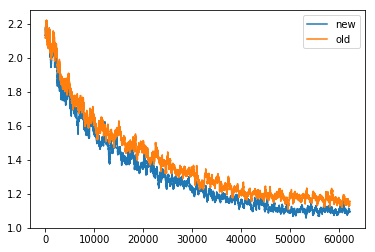

In [161]:
plt.plot(cc_1,label="new")
plt.plot(cc,label="old")
plt.legend()

In [ ]:
12/9

In [ ]:
import pulp
pulp.pulpTestAll()

In [141]:

ll_7=np.loadtxt('test_0.out')
ll_8 = np.loadtxt('test_0_test_1_g_GCN_cp.out')
ll_7 =np.array(ll_7)
ll_8=np.array(ll_8)
print(len(ll_7))
print(len(ll_8))
cc =[]
cc_1=[]
last =360
for i in range(len(ll_7[-last:])):
    cc.append(np.mean(ll_7[-last+i:-last+30+i]))
    cc_1.append(np.mean(ll_8[-last+i:-last+30+i]))
    

2500
665


/home/louis/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/louis/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


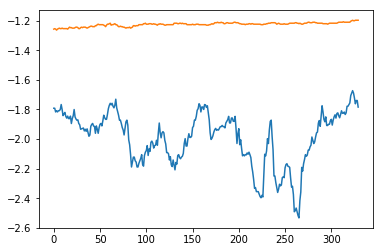

In [142]:
plt.plot(cc)
plt.plot(cc_1)

In [ ]:
0.99997**(3000*30)

In [ ]:
0.999985**(16000*15)

In [ ]:
0.999985**(700*5*8)

In [ ]:
700*5*8

In [ ]:
a=torch.ones((3,3))
a[1,2]=0
b=torch.ones((3,3))*2
b[0,1]=0

In [ ]:
torch.matmul(a,b)

In [ ]:
print(a)
print(b)

In [143]:

ll_7=np.loadtxt('test_6_10_12_1layer_ed_opti.out')
ll_8 = np.loadtxt('test_6_10_12_2_layer_opt.out')
ll_7 =np.array(ll_7)
ll_8=np.array(ll_8)
print(len(ll_7))
print(len(ll_8))
cc =[]
cc_1=[]
last =17500
for i in range(len(ll_7[-last:])):
    cc.append(np.mean(ll_7[-last+i:-last+200+i]))
    cc_1.append(np.mean(ll_8[-last+i:-last+200+i]))
    

17500
17500


/home/louis/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/louis/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0,0.5,'Approximation ratio')

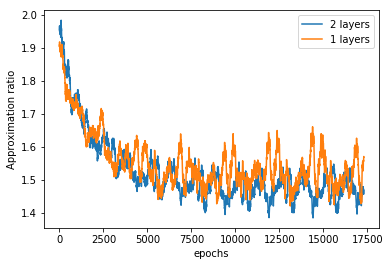

In [144]:
plt.plot(cc,label="2 layers")
plt.plot(cc_1, label="1 layers")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Approximation ratio')

In [145]:

ll_7=np.loadtxt('test_6_10_10_corr.out')
ll_8 = np.loadtxt('test_6_10_12_corr.out')
ll_7 =np.array(ll_7)
#ll_8=np.array(ll_8)*-1
print(len(ll_7))
#print(len(ll_8))
cc =[]
cc_1=[]
last =17500
for i in range(len(ll_7[-last:])):
    cc.append(np.mean(ll_7[-last+i:-last+100+i]))
    cc_1.append(np.mean(ll_8[-last+i:-last+200+i]))
print(len(cc))

17500
17500


/home/louis/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/louis/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0,0.5,'Approximation ratio')

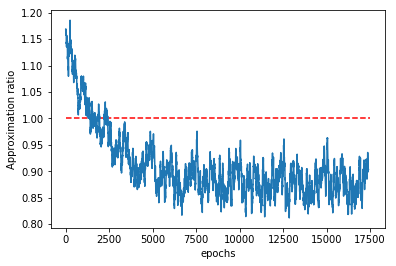

In [146]:
plt.plot(cc)
#plt.plot(cc_1)
plt.hlines(y=1,xmin=0,xmax=17500,linestyles='--',colors='r')
plt.xlabel('epochs')
plt.ylabel('Approximation ratio')
#plt.plot(cc_1)

In [ ]:
x = np.linspace(1,10000,10000)
y = 0.02 +  (1- 0.02) * (8000 - x) / 8000
            
plt.plot(x,0.9997**x)
plt.plot(x,y)

In [ ]:

ll_7=np.loadtxt('test_6.out')
ll_8 = np.loadtxt('test_6_10_18_mvc_eb_32b.out')
#ll_all = np.concatenate([ll,ll_5])
ll_7 =np.array(ll_7)
ll_8=np.array(ll_8)
print(len(ll_7))
cc =[]
cc_1=[]
length=17500
for i in range(len(ll_7[-length:])):
    cc.append(np.mean(ll_7[-length+i:-length+200+i]))
    cc_1.append(np.mean(ll_8[-length+i:-length+200+i]))

In [ ]:
plt.plot(cc,label="10_18")
plt.plot(cc_1,label="10_12")
plt.legend()
plt.show()

In [ ]:
g=nx.erdos_renyi_graph(n=20,p=0.15,seed=125)
pos=nx.spring_layout(g,weight=0.9,iterations=18)


In [ ]:
edge_color=[]
for u,v in g.edges():
    if (u ==8) | (v==8):
        edge_color.append('g')
    else:
        edge_color.append('powderblue')
node_color=[]
for u in g.nodes():
    if (u ==8) | (u in list(g[8])):
        node_color.append('g')
    else:
        node_color.append('powderblue')
nx.draw(g,with_labels=True,seed=125,pos=pos,edge_color=edge_color,node_color=node_color,alpha=0.9)

In [ ]:
edge_color=[]
selec=[8,11,13,1,7,14,9]
for u,v in g.edges():
    if (u in selec) | (v in selec):
        edge_color.append('g')
    else:
        edge_color.append('powderblue')
node_color=[]
for u in g.nodes():
    adj=[]
    for x in selec:
        adj+=list(g[x])
    
    if (u in selec) | (u in list(set(adj))):
        node_color.append('g')
        if (u == selec[-1]) :
            node_color[-1]='tomato'
    else:
        node_color.append('powderblue')
nx.draw(g,with_labels=True,seed=125,pos=pos,edge_color=edge_color,node_color=node_color,alpha=0.9)

In [ ]:
list(g.neighbors(8))

In [191]:
#weight=torch.load('model_mvc_10_14.pt')
weight=torch.load('model.pt')
weight

OrderedDict([('mu_1',
              tensor([[-7.46363584767095744610e-05, -2.88207568228244781494e-02,
                       -1.43299484625458717346e-02, -1.78874994162470102310e-04,
                       -1.35060894535854458809e-04,  1.50067001581192016602e-01,
                       -1.31417829543352127075e-02, -7.62089039199054241180e-04,
                       -4.35645552352070808411e-03, -8.02402850240468978882e-03,
                        2.56020367145538330078e-01,  2.68602430820465087891e-01,
                        1.14749372005462646484e-01,  7.95751884579658508301e-02,
                        7.51655623316764831543e-02, -9.86528117209672927856e-04,
                       -2.19201687723398208618e-02, -5.10847149416804313660e-03,
                       -6.43361476249992847443e-04, -5.34865027293562889099e-03,
                       -3.49837297108024358749e-04, -9.43629909306764602661e-03,
                       -4.36453614383935928345e-03, -5.39553631097078323364e-03,
      

In [442]:

class S2V_QN_1(torch.nn.Module):
    def __init__(self,reg_hidden, embed_dim, len_pre_pooling, len_post_pooling, T):

        super(S2V_QN_1, self).__init__()
        self.T = T
        self.embed_dim=embed_dim
        self.reg_hidden=reg_hidden
        self.mu= torch.zeros(embed_dim,embed_dim)
        #self.len_pre_pooling = len_pre_pooling
        #self.len_post_pooling = len_post_pooling
        #self.mu_1 = torch.nn.Linear(1, embed_dim)
        #torch.nn.init.normal_(self.mu_1.weight,mean=0,std=0.01)
        self.mu_1 = torch.nn.Parameter(torch.Tensor(1, embed_dim))
        self.mu_1=torch.nn.Parameter(weight['mu_1'])
        #torch.nn.init.normal_(self.mu_1, mean=0, std=0.01)
        self.mu_2 = torch.nn.Linear(embed_dim, embed_dim,True)
        self.mu_2.weight=torch.nn.Parameter(weight['mu_2.weight'])
        self.mu_2.biais=torch.nn.Parameter(weight['mu_2.bias'])
        #torch.nn.init.normal_(self.mu_2.weight, mean=0, std=0.01)
        
        self.q_1 = torch.nn.Linear(embed_dim, embed_dim,bias=True)
        self.q_1.weight=torch.nn.Parameter(weight['q_1.weight'])
        self.q_1.biais=torch.nn.Parameter(weight['q_1.bias'])
        #torch.nn.init.normal_(self.q_1.weight, mean=0, std=0.01)
        self.q_2 = torch.nn.Linear(embed_dim, embed_dim,bias=True)
        self.q_2.weight=torch.nn.Parameter(weight['q_2.weight'])
        self.q_2.biais=torch.nn.Parameter(weight['q_2.bias'])
                        
        #torch.nn.init.normal_(self.q_2.weight, mean=0, std=0.01)
        if self.reg_hidden > 0:
            self.q_reg = torch.nn.Linear(2 * embed_dim, self.reg_hidden)
            self.q_reg.weight=torch.nn.Parameter(weight['q_reg.weight'])
            self.q_reg.biais=torch.nn.Parameter(weight['q_reg.bias'])
            #torch.nn.init.normal_(self.q_reg.weight, mean=0, std=0.01)
            self.q = torch.nn.Linear(self.reg_hidden, 1)
            self.q.weight=torch.nn.Parameter(weight['q.weight'])
            self.q.biais=torch.nn.Parameter(weight['q.bias'])
        else:
            self.q = torch.nn.Linear(2 * embed_dim, 1)
            self.q.weight=torch.nn.Parameter(weight['q.weight'])
            self.q.biais=torch.nn.Parameter(weight['q.bias'])
        #torch.nn.init.normal_(self.q.weight, mean=0, std=0.01)

    def forward(self, xv, adj):

        minibatch_size = xv.shape[0]
        nbr_node = xv.shape[1]


        for t in range(self.T):
            if t == 0:
                #mu = self.mu_1(xv).clamp(0)
                self.mu = torch.matmul(xv, self.mu_1).clamp(0)
                #mu.transpose_(1,2)
                #mu_2 = self.mu_2(torch.matmul(adj, mu_init))
                #mu = torch.add(mu_1, mu_2).clamp(0)

            else:
                #mu_1 = self.mu_1(xv).clamp(0)
                mu_1 = torch.matmul(xv, self.mu_1).clamp(0)
                #mu_1.transpose_(1,2)
                # before pooling:
                #for i in range(self.len_pre_pooling):
                #    mu = self.list_pre_pooling[i](mu).clamp(0)

                mu_pool = torch.matmul(adj, self.mu)

                # after pooling
                #for i in range(self.len_post_pooling):
                #    mu_pool = self.list_post_pooling[i](mu_pool).clamp(0)

                mu_2 = self.mu_2(mu_pool)
                self.mu = torch.add(mu_1, mu_2).clamp(0)

        q_1 = self.q_1(torch.matmul(xv.transpose(1,2),self.mu)).expand(minibatch_size,nbr_node,self.embed_dim)
        q_2 = self.q_2(self.mu)
        q_ = torch.cat((q_1, q_2), dim=-1)
        if self.reg_hidden > 0:
            q_reg = self.q_reg(q_).clamp(0)
            q = self.q(q_reg)
        else:
            q_=q_.clamp(0)
            q = self.q(q_)
        return q
    
model = S2V_QN_1(reg_hidden=64,embed_dim=64,len_pre_pooling=0,len_post_pooling=0,T=5)

In [443]:
model.mu

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [481]:
node=50
g=nx.erdos_renyi_graph(p=0.15,n=node,seed=np.random.seed(627))
xv=torch.zeros(1, node, 1, dtype=torch.float)
#xv[:,9,:]=1
#xv[:,8,:]=1
adj =nx.adj_matrix(g)
adj = adj.todense()
adj = torch.from_numpy(np.expand_dims(adj.astype(int), axis=0))
adj = adj.type(torch.FloatTensor)

q=model(xv,adj)
q

tensor([[[14.28131580352783203125],
         [24.05461502075195312500],
         [ 7.43200540542602539062],
         [15.15580844879150390625],
         [ 9.18322181701660156250],
         [13.10358333587646484375],
         [17.40460205078125000000],
         [12.19045543670654296875],
         [23.82216644287109375000],
         [ 7.05704593658447265625],
         [17.25232696533203125000],
         [20.00258636474609375000],
         [18.79585075378417968750],
         [21.22477340698242187500],
         [14.41637134552001953125],
         [15.75590419769287109375],
         [17.75372886657714843750],
         [ 8.76658630371093750000],
         [10.27936077117919921875],
         [15.49850082397460937500],
         [ 9.20280742645263671875],
         [14.18077754974365234375],
         [10.15601634979248046875],
         [16.25111961364746093750],
         [ 3.78031039237976074219],
         [ 9.38233947753906250000],
         [ 9.47266864776611328125],
         [21.515836715698242

In [482]:


torch.set_printoptions(precision=20)

In [483]:
xv[:,2,:]=1
xv

tensor([[[0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [484]:
q

tensor([[[14.28131580352783203125],
         [24.05461502075195312500],
         [ 7.43200540542602539062],
         [15.15580844879150390625],
         [ 9.18322181701660156250],
         [13.10358333587646484375],
         [17.40460205078125000000],
         [12.19045543670654296875],
         [23.82216644287109375000],
         [ 7.05704593658447265625],
         [17.25232696533203125000],
         [20.00258636474609375000],
         [18.79585075378417968750],
         [21.22477340698242187500],
         [14.41637134552001953125],
         [15.75590419769287109375],
         [17.75372886657714843750],
         [ 8.76658630371093750000],
         [10.27936077117919921875],
         [15.49850082397460937500],
         [ 9.20280742645263671875],
         [14.18077754974365234375],
         [10.15601634979248046875],
         [16.25111961364746093750],
         [ 3.78031039237976074219],
         [ 9.38233947753906250000],
         [ 9.47266864776611328125],
         [21.515836715698242

In [485]:
model.mu.detach().numpy()[0]

array([[0.       , 0.8617108, 0.       , ..., 2.9443212, 1.6430234,
        0.       ],
       [0.       , 1.2265255, 0.       , ..., 5.152973 , 2.7418263,
        0.       ],
       [0.       , 0.5079716, 0.       , ..., 1.5078253, 0.8041742,
        0.       ],
       ...,
       [0.       , 0.9792337, 0.       , ..., 3.3934157, 1.9109591,
        0.       ],
       [0.       , 1.3594515, 0.       , ..., 5.7255826, 3.066163 ,
        0.       ],
       [0.       , 1.1541593, 0.       , ..., 4.7845616, 2.549925 ,
        0.       ]], dtype=float32)

array([[ 2.5364783e-01,  1.7921638e-01, -4.1509092e-02],
       [-4.0096822e+00,  1.4908285e-01, -7.2916701e-02],
       [ 3.2532051e+00,  2.2622366e-01, -2.3982435e-02],
       [-1.6413257e-01, -2.5274789e-02, -3.9184798e-02],
       [ 2.1211250e+00,  4.3738917e-02,  1.3270833e-02],
       [ 6.1062241e-01,  8.0947705e-02, -1.5196304e-02],
       [-1.4364524e+00, -1.4386666e-01,  5.0625717e-03],
       [ 7.9112351e-01, -6.0314488e-02,  9.7928150e-03],
       [-3.6610017e+00,  9.2058189e-02,  3.3521077e-01],
       [ 3.3683019e+00, -7.0172191e-02, -1.8782090e-02],
       [-1.2050676e+00, -1.8033626e-02, -2.8021710e-02],
       [-2.2344341e+00,  1.8181315e-01, -7.0206083e-02],
       [-1.7021056e+00,  1.1346479e-01, -7.6561615e-02],
       [-2.6506968e+00,  4.0503234e-01, -8.1929266e-02],
       [ 1.5604529e-01,  1.8021563e-01, -3.1562373e-02],
       [-7.2399694e-01, -3.3650556e-01,  2.6720262e-03],
       [-1.6172273e+00, -2.7121165e-01, -1.3563857e-02],
       [ 2.2207050e+00, -3.3405

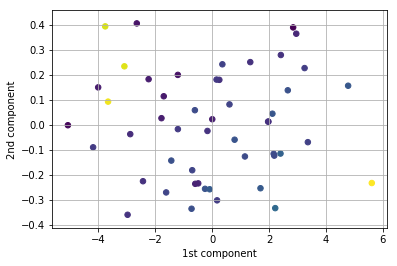

In [502]:
pca = decomposition.PCA(n_components=3)
x=model.mu.detach().numpy()[0]
#x=np.sqrt(10000*x)
result = pca.fit_transform(x)

plt.scatter(result[:, 0], result[:, 1],s=30,c=result[:,2])
#for k,(i,j) in enumerate(zip(result[:,0],result[:,1])):
 #   plt.annotate('%s)' %k, xy=(i,j), xytext=((-1)**(k)*20,(-1)**(k)*10), textcoords='offset points')
    #plt.annotate('(%s,' %i, xy=(i,j))
plt.grid()
plt.xlabel("1st component")
plt.ylabel("2nd component")
result

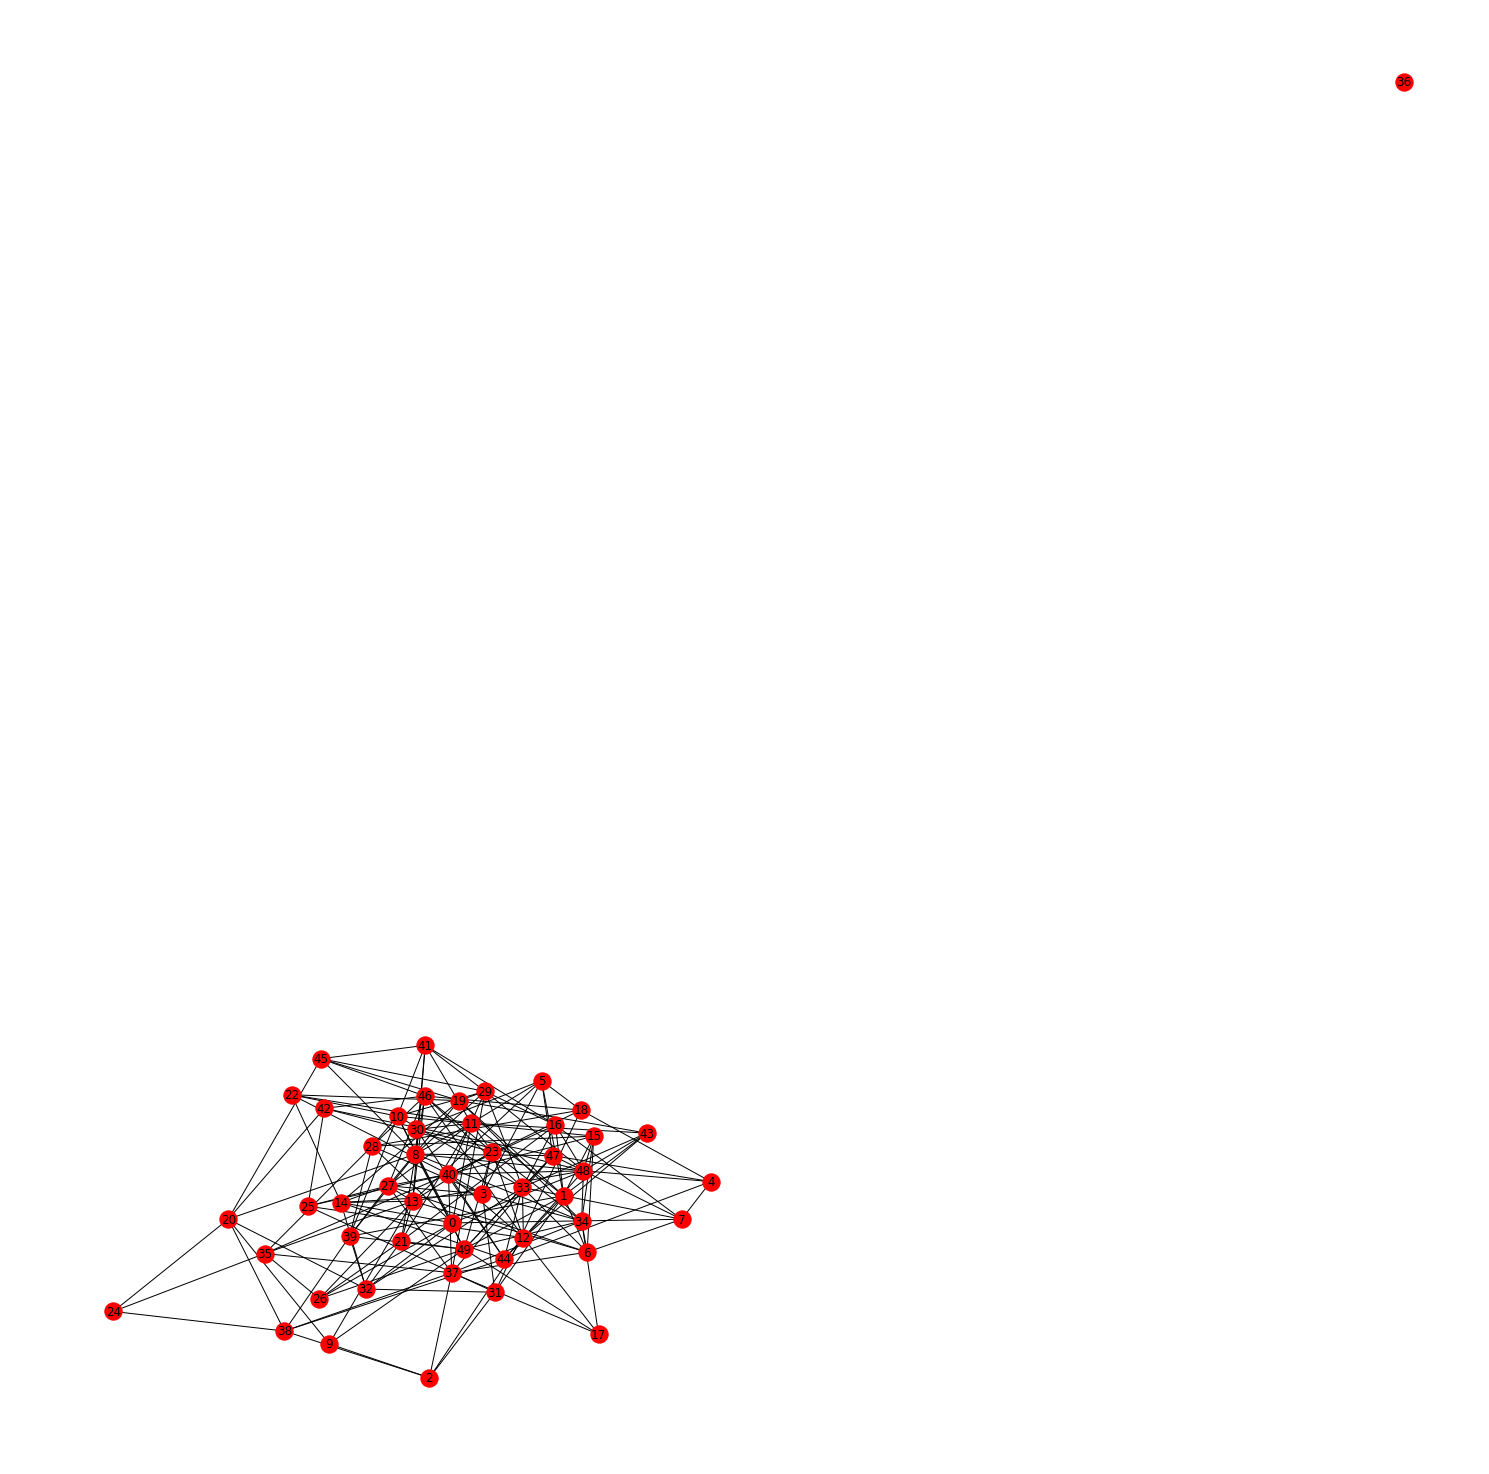

In [487]:
plt.figure(figsize=(20,20))
nx.draw(g,with_labels=True)

array([[-2.13837191e-01,  2.21241582e-02, -7.47990757e-02],
       [ 2.20150977e-01,  1.88688070e-01, -1.31910411e-03],
       [ 2.79700398e-01,  4.32675928e-02, -2.77423840e-02],
       [-1.96207181e-01, -1.87485531e-01, -1.02826156e-01],
       [-1.82119861e-01, -1.82752654e-01, -5.65182455e-02],
       [-1.60059959e-01,  1.29477344e-02,  1.93438604e-01],
       [ 3.11515957e-01, -1.84131518e-01, -4.85637151e-02],
       [-2.29975984e-01,  3.45656335e-01, -2.57622078e-02],
       [ 2.89319277e-01, -1.21395327e-02,  1.29714224e-03],
       [-2.01967746e-01,  1.74444437e-01, -3.98524329e-02],
       [-1.42003283e-01, -2.24292904e-01,  9.20168310e-02],
       [-2.00663134e-01,  9.49435402e-03, -3.70697565e-02],
       [ 2.85954237e-01,  5.48823690e-03, -5.11574605e-03],
       [-1.60707787e-01, -6.99583218e-02,  8.48893300e-02],
       [ 2.79700398e-01,  4.32675853e-02, -2.77423542e-02],
       [ 2.83208132e-01,  1.06935641e-02,  3.56249474e-02],
       [-1.70250148e-01, -2.34420493e-01

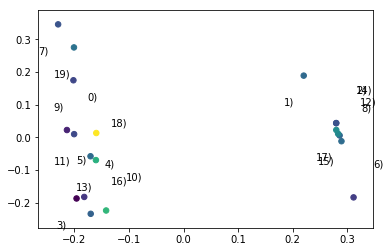

In [510]:
pca = decomposition.PCA(n_components=3)
x=model.mu.detach().numpy()[0]
#x=np.sqrt(10000*x)
result = pca.fit_transform(x)

plt.scatter(result[:, 0], result[:, 1],s=30,c=result[:,2])
for k,(i,j) in enumerate(zip(result[:,0],result[:,1])):
    plt.annotate('%s)' %k, xy=(i,j), xytext=((-1)**(k)*20,(-1)**(k)*30), textcoords='offset points')
    #plt.annotate('(%s,' %i, xy=(i,j))
result

In [489]:
xv=torch.zeros(32, node, 1, dtype=torch.float)
done=False
def get_reward(observation,last_observation,g):

    new_nbr_nodes=np.sum(observation[0].numpy())
    last_nbr_nodes=np.sum(last_observation[0].numpy())
    
    if new_nbr_nodes - last_nbr_nodes > 0:
        reward = -1#np.round(-1.0/20.0,3)
    else:
        reward = 0

    #Minimum vertex set:

    done = True

    edge_add = 0

    for edge in g.edges():
        if observation[:,edge[0],:]==0 and observation[:,edge[1],:]==0:
            done=False
            # break
        else:
            edge_add += 1

    return (reward,done)
def get_optimal(g):
    x = list(range(g.number_of_nodes()))
    xv = pulp.LpVariable.dicts('is_opti', x,
                               lowBound=0,
                               upBound=1,
                               cat=pulp.LpInteger)

    mdl = pulp.LpProblem("MVC", pulp.LpMinimize)

    mdl += sum(xv[k] for k in xv)

    for edge in g.edges():
        mdl += xv[edge[0]] + xv[edge[1]] >= 1, "constraint :" + str(edge)
    mdl.solve()

    #print("Status:", pulp.LpStatus[mdl.status])
    optimal=0
    for x in xv:
        optimal += xv[x].value()
        #print(xv[x].value())
    return optimal

In [490]:
xv[:,8,:]=1

In [491]:
#model(xv,adj)

0


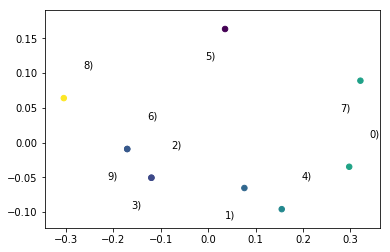

5


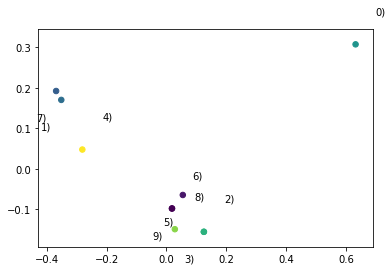

7


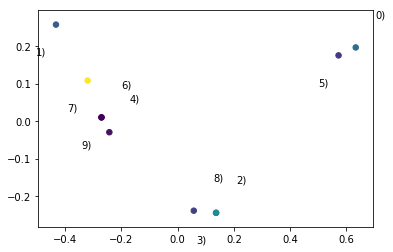

-3
3.0
3.0


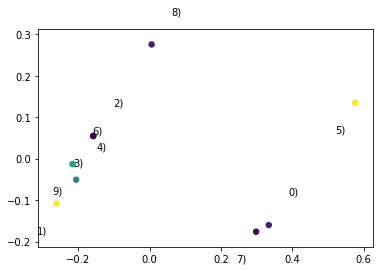

In [524]:
node=10
g=nx.erdos_renyi_graph(p=0.15,n=node,seed=367)
xv=torch.zeros(1, node, 1, dtype=torch.float)
#xv[:,9,:]=1
#xv[:,8,:]=1
adj = nx.adj_matrix(g)
adj = adj.todense()
adj = torch.from_numpy(np.expand_dims(adj.astype(int), axis=0))
adj = adj.type(torch.FloatTensor)
done=False
reward=0
while done==False:
    q_a = model(xv, adj)
    
    q_a=q_a.detach().numpy()
    last_xv=xv.clone()
    selec_=np.where((q_a[0, :, 0] == np.max(q_a[0, :, 0][xv.numpy()[0, :, 0] == 0])))[0][0]
    print(selec_)
    pca = decomposition.PCA(n_components=3)
    x=model.mu.detach().numpy()[0]
    #x=np.sqrt(10000*x)
    result = pca.fit_transform(x)

    plt.scatter(result[:, 0], result[:, 1],s=30,c=result[:,2])
    for k,(i,j) in enumerate(zip(result[:,0],result[:,1])):
        plt.annotate('%s)' %k, xy=(i,j), xytext=((-1)**(k)*20,(-1)**(k)*30), textcoords='offset points')
        #plt.annotate('(%s,' %i, xy=(i,j))
    plt.show()
    xv[:,selec_,:]=1
    (rew,done)=get_reward(xv,last_xv,g)
    reward+=rew
q_a = model(xv, adj)
pca = decomposition.PCA(n_components=3)
x=model.mu.detach().numpy()[0]
#x=np.sqrt(10000*x)
result = pca.fit_transform(x)

plt.scatter(result[:, 0], result[:, 1],s=30,c=result[:,2])
for k,(i,j) in enumerate(zip(result[:,0],result[:,1])):
        plt.annotate('%s)' %k, xy=(i,j), xytext=((-1)**(k)*20,(-1)**(k)*30), textcoords='offset points')
        #plt.annotate('(%s,' %i, xy=(i,j))
print(reward)
print(np.sum(xv[0].numpy()))
print(get_optimal(g))

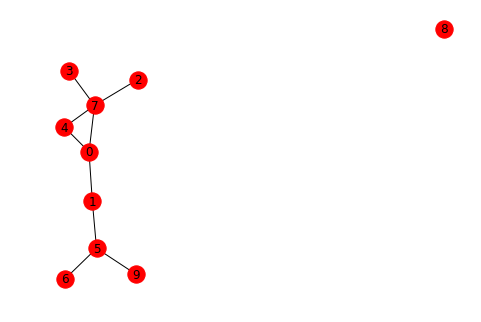

In [520]:
nx.draw(g,with_labels=True)

In [410]:
g.number_of_nodes()

10

In [266]:
for i in range(0):
    print("ee")